In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi


In [2]:
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

c:\users\carlo\appdata\local\programs\python\python38\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [8]:
def controlled_Z(circuit, control1, control2, control3, target):
    
    circuit.cu1(pi/4, control1, target) #T-Gate
    circuit.cx(control1,control2)
    circuit.cu1(-pi/4, control2, target) #T_dagger-Gate
    circuit.cx(control1,control2)
    circuit.cu1(pi/4, control2, target) #T-Gate
    circuit.cx(control2,control3)
    circuit.cu1(-pi/4, control3, target) #T_dagger-Gate
    circuit.cx(control1,control3)
    circuit.cu1(pi/4, control3, target) #T-Gate
    circuit.cx(control2,control3)
    circuit.cu1(-pi/4, control3, target) #T_dagger-Gate
    circuit.cx(control1,control3)
    circuit.cu1(pi/4, control3, target) #T-Gate
    

In [34]:
def phase_oracle(circuit, registers):
    circuit.x(registers[0])
    circuit.x(registers[2])
    controlled_Z(circuit, registers[0], registers[1], registers[2], registers[3])
    circuit.x(registers[0])
    circuit.x(registers[2])


In [10]:
def grover_diffusion(circuit, registers):
    circuit.h(registers)
    circuit.x(registers)
    circuit.barrier()
    controlled_Z(circuit, registers[0], registers[1], registers[2],registers[3])
    circuit.barrier()
    circuit.x(registers)
    circuit.h(registers)


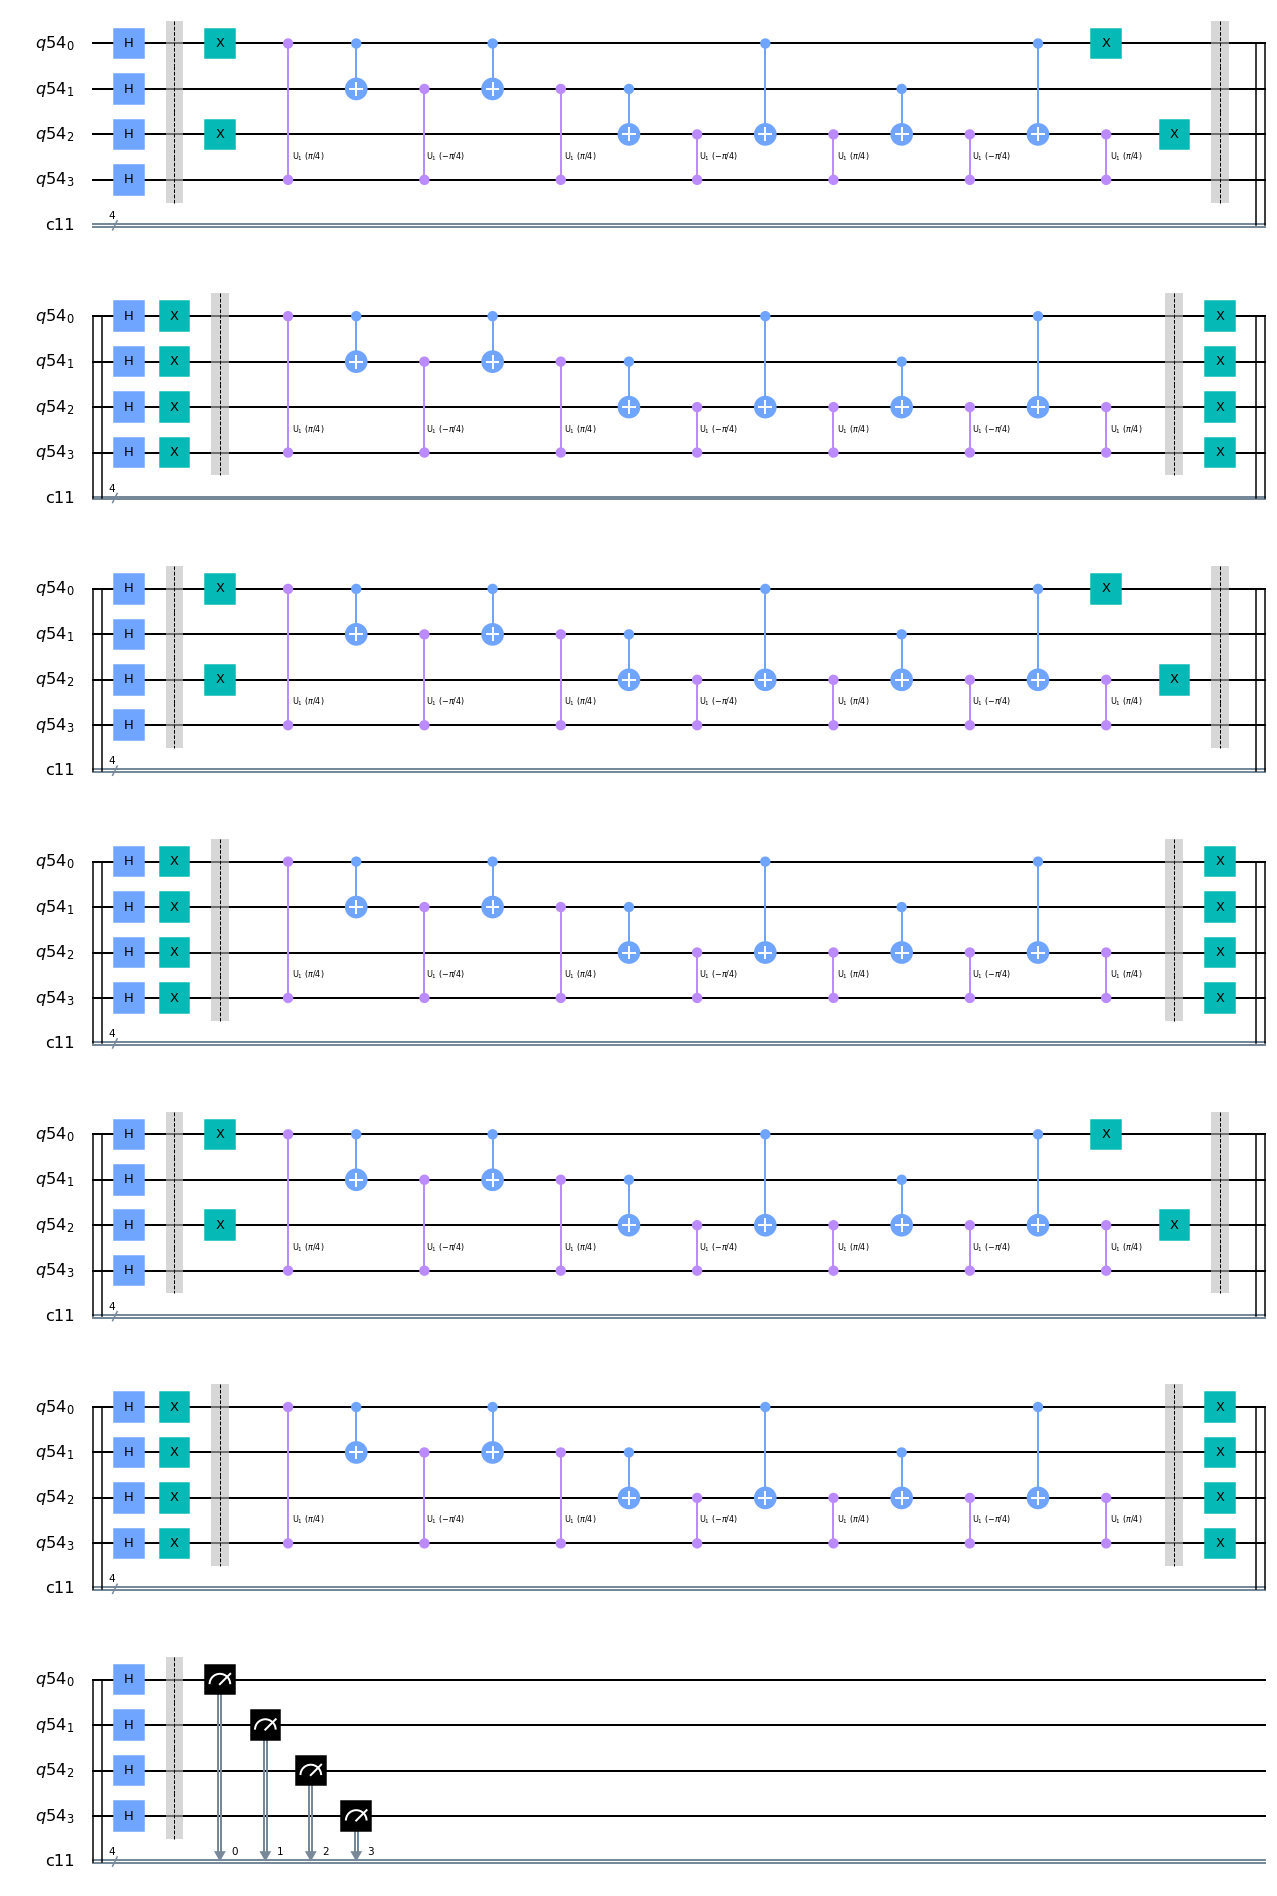

In [35]:
# Define circuit constants
Qubits = 4
tests = 3

# Define register objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit = QuantumCircuit(qr, cr)

# Initialize circuit with Hadamard gates
groverCircuit.h(qr)

# Run phase oracle and diffusion operators
# Can be run multiple times depending on the variable, tests.
for test in range(0,tests):
    groverCircuit.barrier()
    phase_oracle(groverCircuit, qr)
    groverCircuit.barrier()
    grover_diffusion(groverCircuit, qr)
    
# Measure quantum registers
groverCircuit.barrier()
groverCircuit.measure(qr,cr)

# Draw Circuit
groverCircuit.draw(output="mpl")


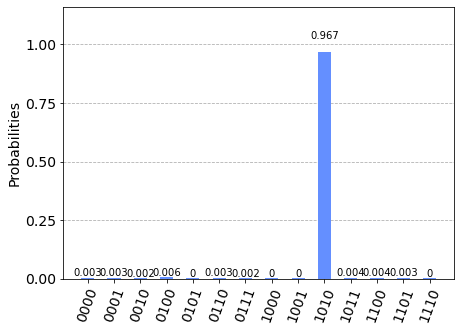

In [36]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)
